**QUANTIZATION:**
Used to build and deploy ML models on cell phones,microcontroller or wearable devices. ML models are of bigger size, to deploy it in edge devices, we need to optimize the model and reduce the model size, making inference and prediction more faster.
Quantization will make the bigger model smaller to fit edge devices. Model saves the weights in float or float64 precision which is 8 byte to store one number.
It converts float which needs more bytes into int (or) flaot 64(8 bytes) to float16(2 bytes).

**2 WAYS TO PERFORM QUANTIZATION:**
**POST TRAINING QUANTIZATION:** tf model to tf.lite convert with quantization, here accuracy may get affected.
**QUANTIZATION AWARE TRAINIING:** tf model -> quantized model -> fine tuned quantised model -> tf lite model.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

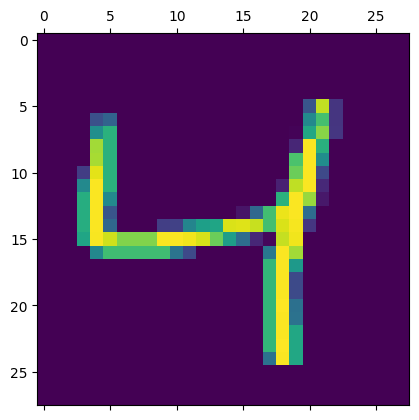

In [6]:
plt.matshow(X_train[2])

In [11]:
X_train = X_train/255
X_test = X_test/255

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8792 - loss: 0.4424
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9623 - loss: 0.1308
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9751 - loss: 0.0848
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9806 - loss: 0.0646
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0497


In [27]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9703 - loss: 0.1001


[0.08066951483488083, 0.9754999876022339]

In [38]:
model.export("./saved_model")

Saved artifact at './saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136352057839632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136352057837872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136352079441312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136352057350400: TensorSpec(shape=(), dtype=tf.resource, name=None)


**(1) Post Training Quantization**

In [40]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
tflite_model = converter.convert()

In [41]:
len(tflite_model)

319976

In [43]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [44]:
len(tflite_quant_model)

86040

In [45]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)